In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_bokeh
import seaborn as sns
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [5]:
df = pd.read_csv("pretrial.csv")

In [7]:
df.columns

Index(['Unnamed: 0', 'internal_case_id', 'gender', 'race', 'ethnicity',
       'age_at_crime', 'age_at_arrest', 'court_name', 'court_ori',
       'county_name',
       ...
       'arraign_article_bxd', 'arraign_section_bxd', 'arrest_article_bxd',
       'arrest_section_bxd', 'conviction_article_bxd',
       'conviction_section_bxd', 'bail_made_amount_bxd', 'dollar_bail_bxd',
       'priors_sum_bxd', 'pending_arrest_sum_bxd'],
      dtype='object', length=119)

In [10]:
df.bail_made_indicator.value_counts(dropna=False)

NaN       175992
cash        4291
bond        3525
credit       310
Name: bail_made_indicator, dtype: int64

In [17]:
bail_off = df[(df.bail_made_indicator.isna() == False) &
  (df.bail_made_amount_bxd != 1.0)]

In [19]:
bail_off.top_arraign_article_section.value_counts()

265.03    1611
120.05     780
215.5      628
215.51     540
160.15     286
          ... 
1212         1
265.11       1
221.3        1
150.1        1
260.21       1
Name: top_arraign_article_section, Length: 142, dtype: int64

In [51]:
bail_off.first_arraign_date = pd.to_datetime(bail_off.first_arraign_date, 
                                             format="%Y-%m-%d")

/Users/jeffshamp/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [67]:
cpw = bail_off[bail_off.top_arraign_article_section == "265.03"] \
[["race", "ethnicity","first_arraign_date", "bail_made_amount_bxd"]]

In [76]:
cpw_plot = cpw[cpw.ethnicity == "hispanic"].groupby(["first_arraign_date", "race"]) \
    .mean()["bail_made_amount_bxd"].reset_index("first_arraign_date")

<AxesSubplot:xlabel='first_arraign_date', ylabel='bail_made_amount_bxd'>

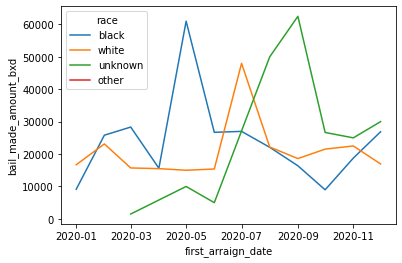

In [77]:
sns.lineplot(x="first_arraign_date", y="bail_made_amount_bxd", hue="race", data=cpw_plot)

In [49]:
cpw = bail_off[bail_off.top_arraign_article_section == "120.05"] \
[["first_arraign_date", "bail_made_amount_bxd"]]
cpw_plot = cpw.groupby("first_arraign_date") \
    .mean()["bail_made_amount_bxd"]
cpw_plot.plot_bokeh(kind="line")

Figure(id='2356', ...)

In [78]:
cpw = bail_off[bail_off.top_arraign_article_section == "160.15"] \
[["first_arraign_date", "bail_made_amount_bxd"]]
cpw_plot = cpw.groupby("first_arraign_date") \
    .mean()["bail_made_amount_bxd"]
cpw_plot.plot_bokeh(kind="line")

Figure(id='2982', ...)